<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 7b</span>
# <span style="color:green">Best Korean Movies in IMDb: Co-Directorship and Co-Actorship Networks

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import hist
import random
from collections import Counter
import operator
import itertools
from wordcloud import WordCloud

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Random100KoreanFilms.csv', encoding="utf-8")
print(len(df))
df.sort_values(by="YEAR").head(28)

926


,Unnamed: 0,YEAR,TITLE,DIRECTOR,ACTOR,GENRE
341,341,1998,Whispering Corridors,Ki-hyeong Park,Roe-ha Kim,Drama
905,905,1998,Christmas in August,Jin-ho Hur,Ji-hye Oh,Romance
342,342,1998,Whispering Corridors,Ki-hyeong Park,Roe-ha Kim,Horror
332,332,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Drama
333,333,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Horror
334,334,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Mystery
898,898,1998,Christmas in August,Jin-ho Hur,Suk-kyu Han,Drama
899,899,1998,Christmas in August,Jin-ho Hur,Suk-kyu Han,Romance
900,900,1998,Christmas in August,Jin-ho Hur,Eun-ha Shim,Drama
901,901,1998,Christmas in August,Jin-ho Hur,Eun-ha Shim,Romance


<a id='1'></a>
## I. The Bipartite Graph of Titles vs. Actors

In [3]:
meds=[]
for i in range(len(df)):
    a=df.iloc[i]['TITLE']
    b=df.iloc[i]['ACTOR']
    c=df.iloc[i]['YEAR']
    meds.append((a,b,c)) 
meds=list(set(meds))
print("Number of multi-edges: %i" %len(meds))
# print "%i nonunique (%i unique)" %(len(meds),len(set(meds)))

Number of multi-edges: 398


In [4]:
H=nx.Graph()
for k in meds:
    H.add_edge(k[0],k[1],year=k[2]) 
print(len(H),len(H.edges()))
ftitles=[i for i in H.nodes() if i in df.TITLE.tolist()]
factors=[i for i in H.nodes() if i in df.ACTOR.tolist()]
nt=len(ftitles)
na=len(factors)
print("The %i nodes of this graph are:" %len(H.nodes()))
print("%i titles and %i actors" %(nt,na))
if nx.is_bipartite(H)==True:
    print("This graph is bipartite")
else:
    print("This graph is not bipartite")
ncc=nx.number_connected_components(H)
if nx.is_connected(H)==True:
    print("This graph is connected")
else:
    print("This graph is not connected and has", ncc, "connected components")
Gl = sorted(connected_component_subgraphs(H), key = len, reverse=True)
Gc=H.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges())))
ftitlesc=[n for n in Gc.nodes() if n in ftitles]
factorsc=[n for n in Gc.nodes() if n in factors]
ntc=len(ftitlesc)
nac=len(factorsc)
print("The %i nodes of the largest connected component are:" %len(Gc.nodes()))
print("%i titles and %i actors" %(ntc,nac))

405 398
The 405 nodes of this graph are:
100 titles and 305 actors
This graph is bipartite
This graph is not connected and has 27 connected components
The largest connected component has:
249 nodes and 268 edges
The 249 nodes of the largest connected component are:
67 titles and 182 actors


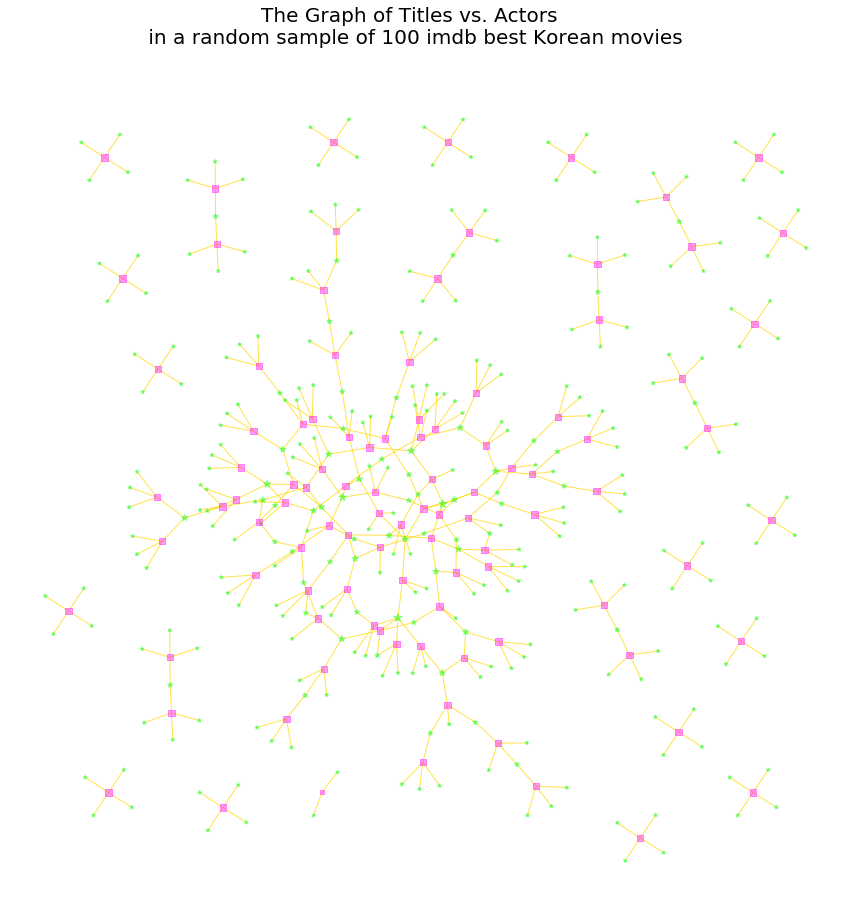

In [5]:
pos=graphviz_layout(H)

labels={}
for i in H.nodes():
    labels[i]=""

node_size1=[10*H.degree(n) for n in ftitles]
node_size2=[15*H.degree(n) for n in factors]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(H,pos=pos,nodelist=factors,node_shape="*",node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=ftitles,node_shape="s",node_color='magenta',node_size=node_size1,font_size=20,alpha=0.4);
nx.draw_networkx_edges(H,pos=pos,edge_color='gold',alpha=0.7); 
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Graph of Titles vs. Actors \n in a random sample of 100 imdb best Korean movies" # largest connected component of the bipartite 
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
# yoffset = {}
# y_off = -30 #0.05  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(H, yoffset,labels=labels,font_size=10);
plt.show()

<a id='2'></a>
## I.1 The Co-Actorship Network of Actors Starring in Common Titles

In [6]:
fay_d={}
for e in H.edges(data=True):
    if e[0] in ftitles:
        fay_d[e[0]]=(list(H.neighbors(e[0])),e[2]['year'])
    if e[1] in ftitles:
        fay_d[e[1]]=(list(H.neighbors(e[1])),e[2]['year'])
# fay_d

In [7]:
aeds=[]
for k,v in fay_d.items():
    for j in itertools.combinations(v[0],2):
        aeds.append((j[0],j[1],v[1]))
print(len(aeds),len(set(aeds)))
# aeds

595 595


In [8]:
maeds=[]
for k,v in Counter(aeds).items():
    maeds.append((k[0],k[1],(v,k[2])))
print(len(maeds), len(set(maeds)))
# maeds

595 595


In [9]:
Ga=nx.MultiGraph()
Ga.add_weighted_edges_from(maeds)

In [10]:
edge_width=[w['weight'] for u,v,w in Ga.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]
set(edge_width)
Counter(edge_width)

Counter({1: 595})

In [11]:
print("The co-actorship (by titles) multigraph has:")
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga.nodes()), len(Ga.edges())))

if Ga.is_multigraph()==True:
    print("The co-actorship (by titles) graph is a multigraph")
else:
    print("The co-actorship (by titles) graph is a simple graph")
if nx.is_weighted(Ga)==True:
    print("The co-actorship (by titles) graph is a weighted graph")
else:
    print("The co-actorship (by titles) graph is an unweighted graph")
    
ncc=nx.number_connected_components(Ga)
if nx.is_connected(Ga)==True:
    print("The co-actorship (by titles) graph is connected")
else:
    print("The co-actorship (by titles) graph is not connected and has", ncc, "connected components")
Gl = sorted(connected_component_subgraphs(Ga), key = len, reverse=True)
Gac=Ga.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Gac.nodes()), len(Gac.edges())))  

The co-actorship (by titles) multigraph has:
305 nodes (actors) and 595 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph is a multigraph
The co-actorship (by titles) graph is a weighted graph
The co-actorship (by titles) graph is not connected and has 27 connected components
The largest connected component has:
182 nodes (actors) and 402 edges (co-actorships by titles)


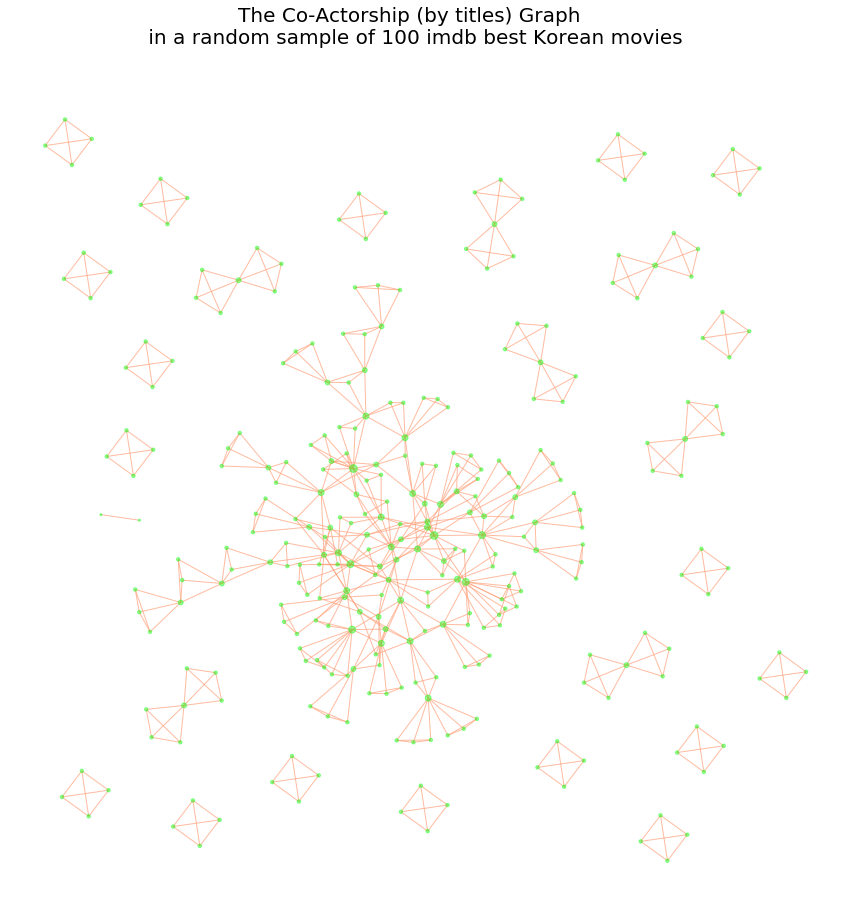

In [12]:
pos=graphviz_layout(Ga)

labels={}
for i in Ga.nodes():
    labels[i]=""

node_size2=[4*Ga.degree(n) for n in Ga.nodes()]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Ga,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph \n in a random sample of 100 imdb best Korean movies" 
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
# yoffset = {}
# y_off = -30 #0.05  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# font_size=10
# nx.draw_networkx_labels(Ga, yoffset,labels=labels);
plt.show()

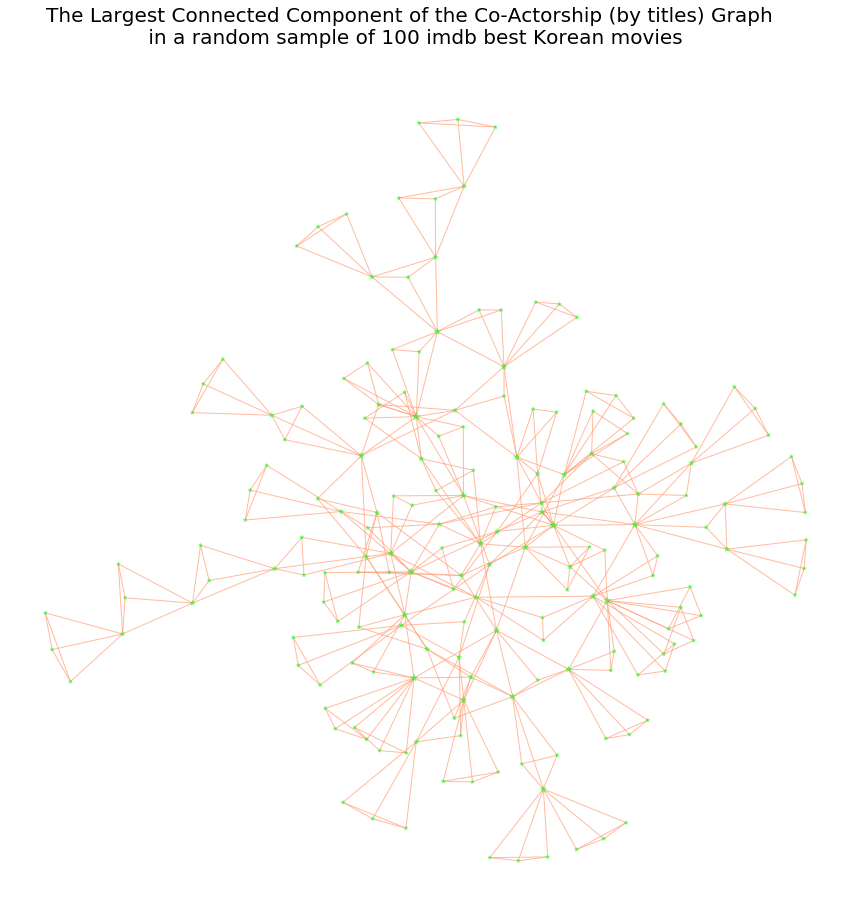

In [13]:
pos=graphviz_layout(Gac)

labels={}
for i in Gac.nodes():
    labels[i]=""

node_size2=[4*Gac.degree(n) for n in Gac.nodes()]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gac,pos=pos,node_shape="*",node_color='lime',node_size=node_size2,alpha=0.4);
nx.draw_networkx_edges(Gac,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Largest Connected Component of the Co-Actorship (by titles) Graph \n in a random sample of 100 imdb best Korean movies" # largest connected component of the bipartite 
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
# yoffset = {}
# y_off = -7 #0.05  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gac, yoffset,labels=labels,font_size=10);
plt.show()

<a id='7'></a>
## II. The Bipartite Graph of Directors vs. Actors

In [14]:
emmeds=[]
for i in range(len(df)):
    a=df.iloc[i]['DIRECTOR']
    b=df.iloc[i]['ACTOR']
    c=df.iloc[i]['YEAR']
    emmeds.append((a,b,c)) 
emmeds=list(set(emmeds))
print("Number of multi-edges: %i" %len(emmeds))
# print("%i nonunique (%i unique)" %(len(meds),len(set(meds))))

Number of multi-edges: 398


In [15]:
Hem=nx.Graph()
for k in emmeds:
    Hem.add_edge(k[0],k[1],year=k[2]) 
print(len(Hem),len(Hem.edges()))
fdirectors=[i for i in Hem.nodes() if i in df.DIRECTOR.tolist()]
factors=[i for i in Hem.nodes() if i in df.ACTOR.tolist()]
nd=len(fdirectors)
na=len(factors)
print("The %i nodes of this graph are:" %len(Hem.nodes()))
print("%i directors and %i actors" %(nd,na))
if nx.is_bipartite(Hem)==True:
    print("This graph is bipartite")
else:
    print("This graph is not bipartite")
ncc=nx.number_connected_components(Hem)
if nx.is_connected(Hem)==True:
    print("This graph is connected")
else:
    print("This graph is not connected and has", ncc, "connected components")
Geml = sorted(connected_component_subgraphs(Hem), key = len, reverse=True)
Gemc=Hem.subgraph(Geml[0])
# print('The largest connected component has:')
# print("%i nodes and %i edges" %(len(Gmc.nodes()), len(Gmc.edges())))
fdirecotrsc=[n for n in Gemc.nodes() if n in fdirectors]
factorsc=[n for n in Gemc.nodes() if n in factors]
ndc=len(fdirecotrsc)
nac=len(factorsc)
print("The %i nodes of the largest connected component are:" %len(Gemc.nodes()))
print("%i directors and %i actors" %(ndc,nac))
len(Gemc.edges())

385 388
The 385 nodes of this graph are:
80 directors and 305 actors
This graph is bipartite
This graph is not connected and has 18 connected components
The 286 nodes of the largest connected component are:
61 directors and 225 actors


306

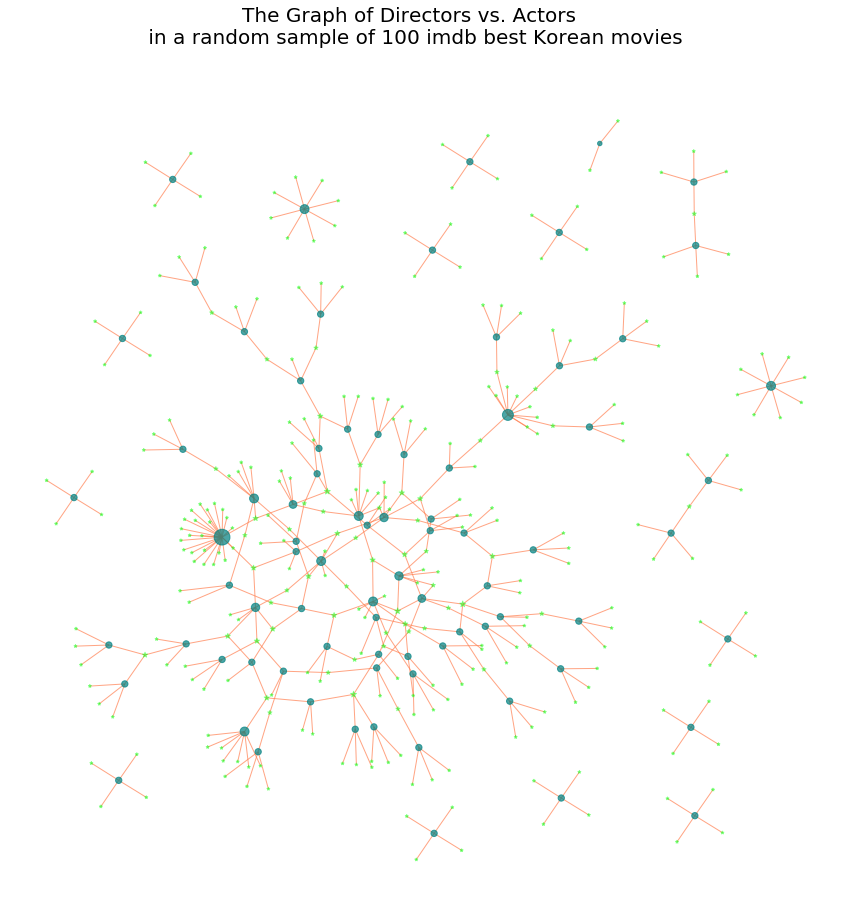

In [16]:
pos=graphviz_layout(Hem)

labels={}
for i in Hem.nodes():
    labels[i]=""

node_size1=[10*Hem.degree(n) for n in fdirectors]
node_size2=[10*Hem.degree(n) for n in factors]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Hem,pos=pos,nodelist=fdirectors,node_color='teal',node_size=node_size1,font_size=20,alpha=0.7);
nx.draw_networkx_nodes(Hem,pos=pos,nodelist=factors,node_shape="*",node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Hem,pos=pos,edge_color='coral',alpha=0.7); 
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Graph of Directors vs. Actors \n in a random sample of 100 imdb best Korean movies" # largest connected component of the bipartite 
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
# yoffset = {}
# y_off = -20 #0.05  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Hem, yoffset,labels=labels,font_size=10);
plt.show()

<a id='8'></a>
## II.1 The Co-Directorship Network of Directors with Common Actors

In [17]:
fay_d3={}
for e in Hem.edges(data=True):
    if e[0] in factors:
        fay_d3[e[0]]=(list(Hem.neighbors(e[0])),e[2]['year'])
    if e[1] in factors:
        fay_d3[e[1]]=(list(Hem.neighbors(e[1])),e[2]['year'])
# fay_d3

In [18]:
kmmaeds=[]
for k,v in fay_d3.items():
    for j in itertools.combinations(v[0],2):
        kmmaeds.append((j[0],j[1],v[1]))
print(len(kmmaeds),len(set(kmmaeds)))
# kmmaeds

113 113


In [19]:
kmmaeds1=[]
for k,v in Counter(kmmaeds).items():
    kmmaeds1.append((k[0],k[1],(v,k[2])))
print(len(kmmaeds1), len(set(kmmaeds1)))
# kmmaeds1

113 113


In [20]:
Gkmm=nx.MultiGraph()
Gkmm.add_weighted_edges_from(kmmaeds1)
# Gkmm.edges(data=True)

In [21]:
print("The co-directorship multigraph has:")
print("%i nodes (directors) and %i edges (i.e., pairs of directors with common actors)" %(len(Gkmm.nodes()), len(Gkmm.edges())))

if Gkmm.is_multigraph()==True:
    print("The co-directorship graph is a multigraph")
else:
    print("The co-directorship graph is a simple graph")
if nx.is_weighted(Gkmm)==True:
    print("The co-directorship graph is a weighted graph")
else:
    print("The co-directorship graph is an unweighted graph")
    
ncc=nx.number_connected_components(Gkmm)
if nx.is_connected(Gkmm)==True:
    print("The co-directorship graph is connected")
else:
    print("The co-directorship graph is not connected and has", ncc, "connected components")
Gkmml = sorted(connected_component_subgraphs(Gkmm), key = len, reverse=True)
Gkmmc=Gkmm.subgraph(Gkmml[0])
print('The largest connected component has:')
print("%i nodes (directors) and %i edges (i.e., pairs of directors with common actors)" %(len(Gkmmc.nodes()), len(Gkmmc.edges())))  

The co-directorship multigraph has:
65 nodes (directors) and 113 edges (i.e., pairs of directors with common actors)
The co-directorship graph is a multigraph
The co-directorship graph is a weighted graph
The co-directorship graph is not connected and has 3 connected components
The largest connected component has:
61 nodes (directors) and 111 edges (i.e., pairs of directors with common actors)


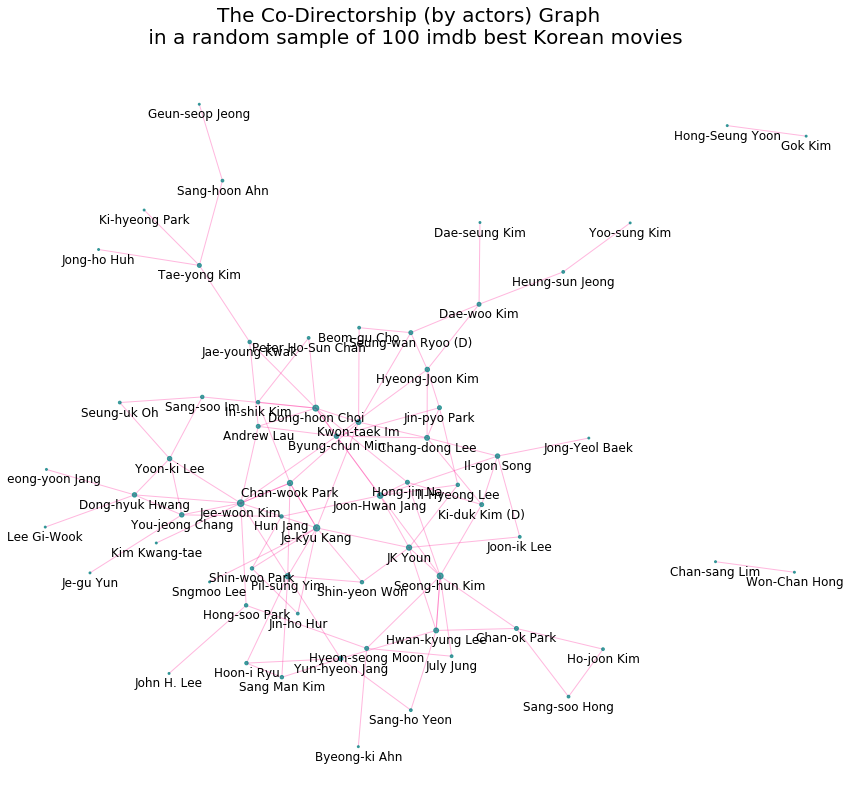

In [22]:
pos=graphviz_layout(Gkmm)

labels={}
for i in Gkmm.nodes():
    labels[i]=i #""

node_size2=[4*Gkmm.degree(n) for n in Gkmm.nodes()]

fig = plt.figure(figsize=(15,13))
nx.draw_networkx_nodes(Gkmm,pos=pos,node_color='teal',node_size=node_size2,font_size=20,alpha=0.7);
nx.draw_networkx_edges(Gkmm,pos=pos,edge_width=edge_width,edge_color='deeppink',alpha=0.3); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Directorship (by actors) Graph \n in a random sample of 100 imdb best Korean movies"
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=8
nx.draw_networkx_labels(Gkmm, yoffset,labels=labels);
plt.show()

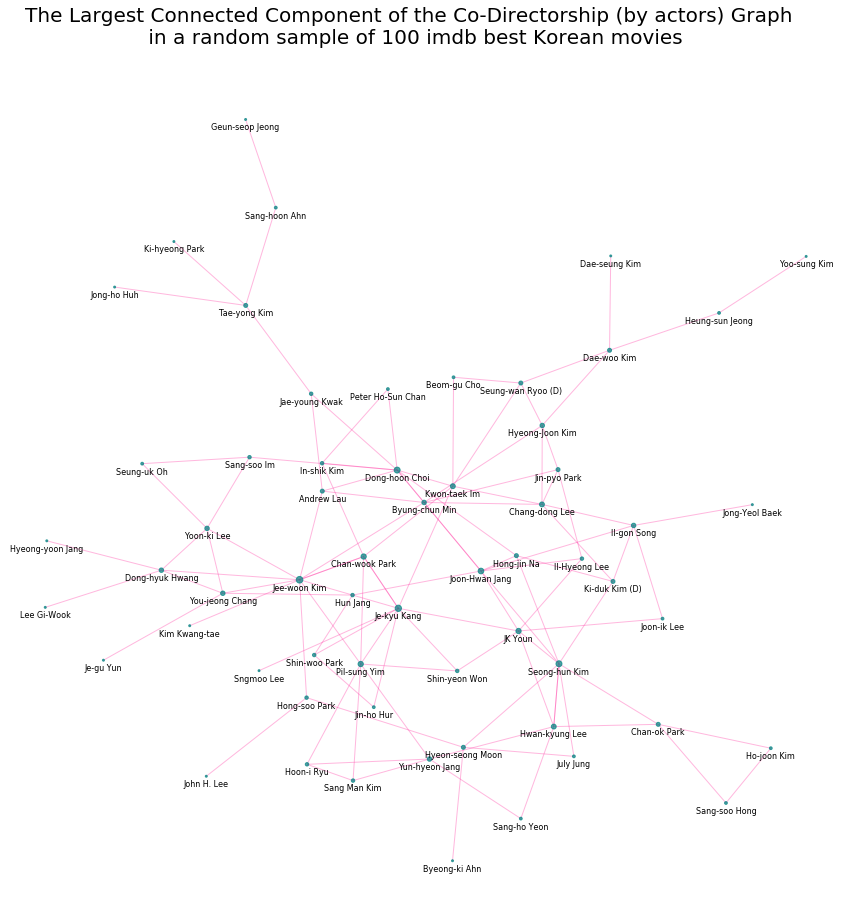

In [23]:
pos=graphviz_layout(Gkmmc)

labels={}
for i in Gkmmc.nodes():
    labels[i]=i #""

node_size2=[4*Gkmmc.degree(n) for n in Gkmmc.nodes()]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gkmmc,pos=pos,node_color='teal',node_size=node_size2,alpha=0.7);
nx.draw_networkx_edges(Gkmmc,pos=pos,edge_width=edge_width,edge_color='deeppink',alpha=0.3); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Largest Connected Component of the Co-Directorship (by actors) Graph \n in a random sample of 100 imdb best Korean movies" 
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -7 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gkmmc, yoffset,labels=labels,font_size=8);
plt.show()

<a id='13'></a>
## III. Longitudinal Co-Actorship Networks

In [24]:
slots=[range(1997,2000),range(2000,2004),range(2004,2008),range(2008,2012),
       range(2012,2016),range(2016,2020)]
sslots=["1997-99","2000-03","2004-07","2008-11","2012-15","2016-19"]
periods={}
tuy=zip(sslots,slots)
GG={}
GG={}
for t in tuy:
    bin=[]
    for year in t[1]:
        for e in Ga.edges(data=True):
            if year==int(e[2]['weight'][1]):
                bin.append((e[0],e[1],(e[2]['weight'][0],e[2]['weight'][1])))
    g=nx.MultiGraph()
    g.add_weighted_edges_from(bin)
    GG[t[0]]=g
s=0
for k,v in GG.items():
    s+=len(v.edges())
    print(k,len(v),len(v.edges()))
print(len(Ga.edges()),s)

1997-99 25 42
2000-03 53 79
2004-07 77 126
2008-11 77 126
2012-15 105 168
2016-19 35 54
595 595


In [25]:
yl=[]
for e in GG['2012-15'].edges(data=True):
    yl.append(e[2]['weight'][1])
yl=sorted(set(yl))
yl

[2012, 2013, 2014, 2015]

The co-actorship (by titles) multigraph in the period 1997-99 has:
25 nodes (actors) and 42 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 1997-99 is a multigraph
The co-actorship (by titles) graph in the period 1997-99 is a weighted graph
The co-actorship (by titles) graph in the period 1997-99 is not connected and it has 4 connected components
The largest connected component has:
7 nodes (actors) and 12 edges (co-actorships by titles)


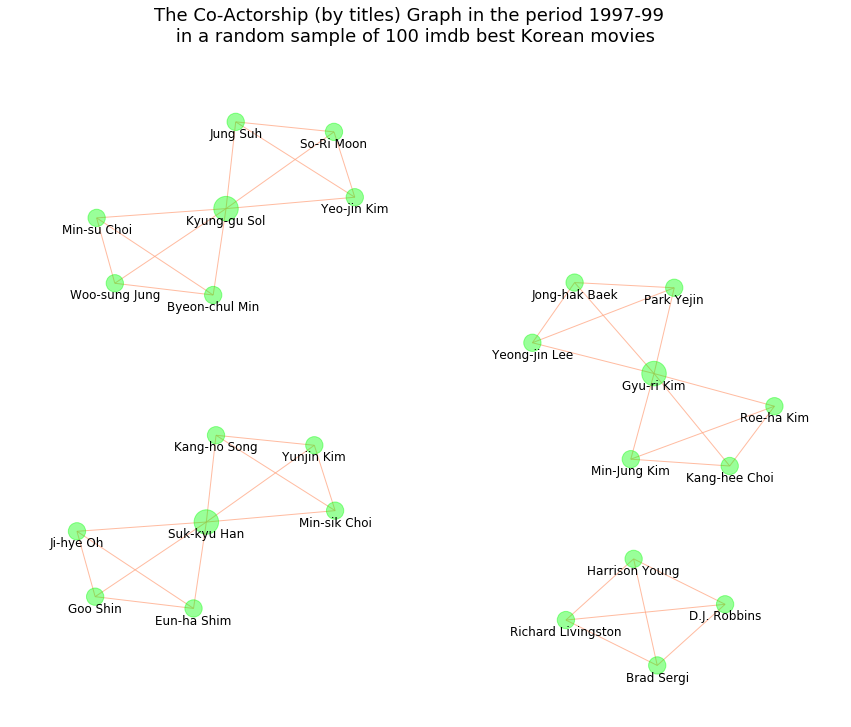

In [26]:
p=sslots[0]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 

pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[100*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=18);
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=12);
plt.margins(x=0.1, y=0.1);
plt.show()

The co-actorship (by titles) multigraph in the period 2000-03 has:
53 nodes (actors) and 79 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 2000-03 is a multigraph
The co-actorship (by titles) graph in the period 2000-03 is a weighted graph
The co-actorship (by titles) graph in the period 2000-03 is not connected and it has 13 connected components
The largest connected component has:
7 nodes (actors) and 12 edges (co-actorships by titles)


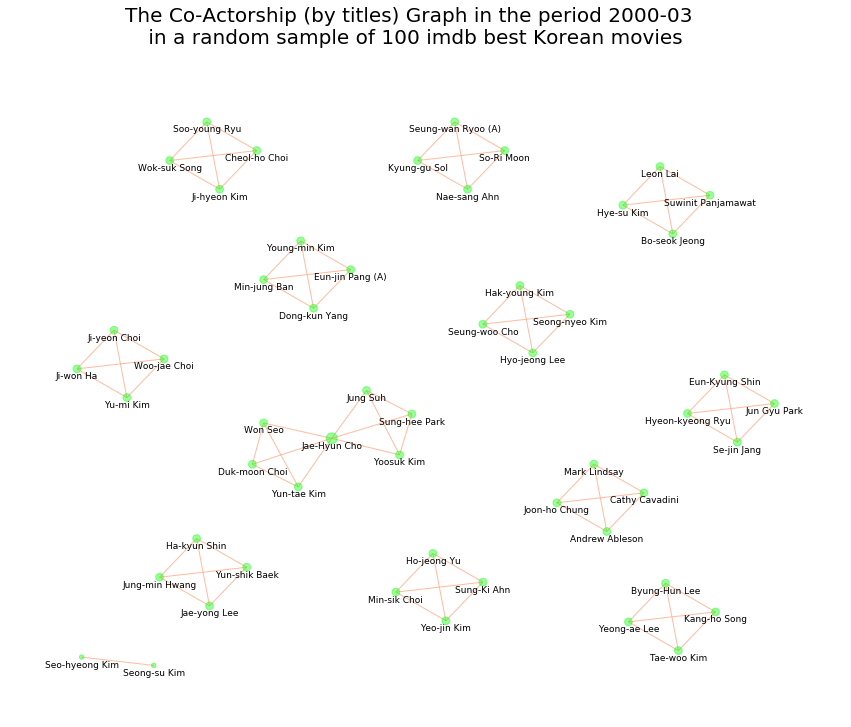

In [27]:
p=sslots[1]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 
pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[20*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p

fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()

The co-actorship (by titles) multigraph in the period 2004-07 has:
77 nodes (actors) and 126 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 2004-07 is a multigraph
The co-actorship (by titles) graph in the period 2004-07 is a weighted graph
The co-actorship (by titles) graph in the period 2004-07 is not connected and it has 14 connected components
The largest connected component has:
10 nodes (actors) and 18 edges (co-actorships by titles)


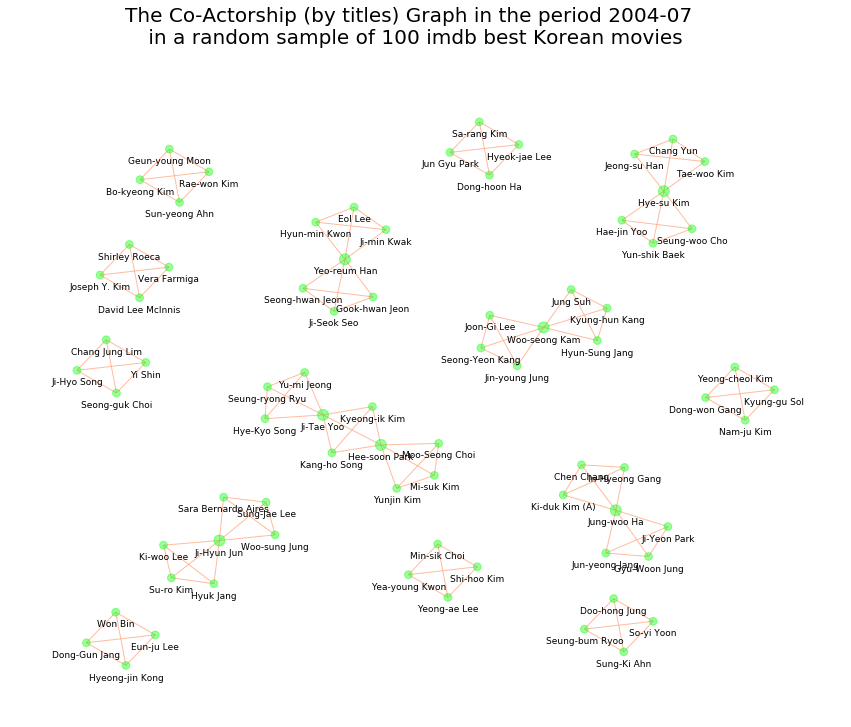

In [28]:
p=sslots[2]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 
pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[20*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()

The co-actorship (by titles) multigraph in the period 2008-11 has:
77 nodes (actors) and 126 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 2008-11 is a multigraph
The co-actorship (by titles) graph in the period 2008-11 is a weighted graph
The co-actorship (by titles) graph in the period 2008-11 is not connected and it has 14 connected components
The largest connected component has:
13 nodes (actors) and 24 edges (co-actorships by titles)


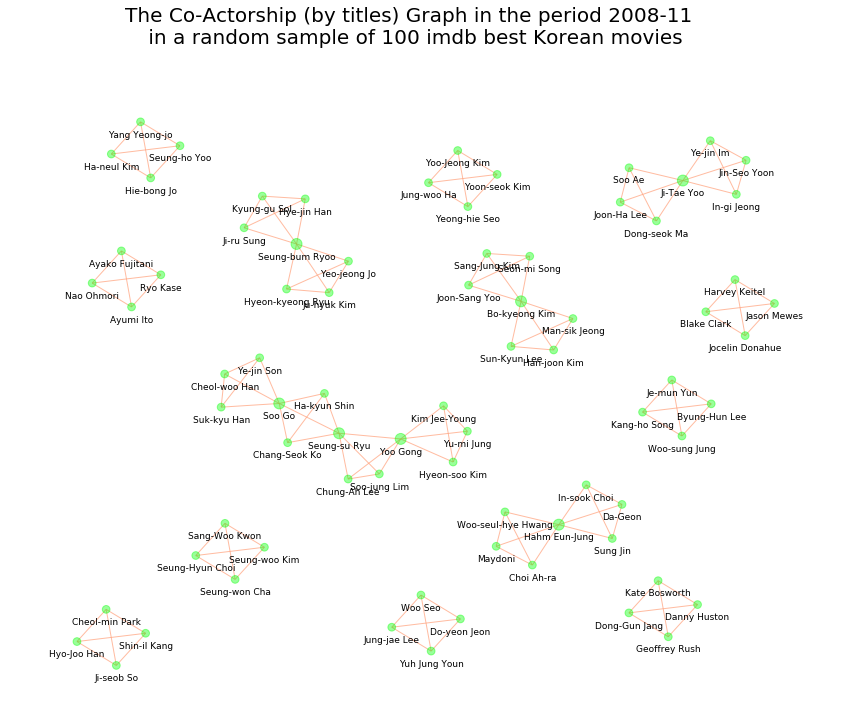

In [29]:
p=sslots[3]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 

pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[20*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()

The co-actorship (by titles) multigraph in the period 2012-15 has:
105 nodes (actors) and 168 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 2012-15 is a multigraph
The co-actorship (by titles) graph in the period 2012-15 is a weighted graph
The co-actorship (by titles) graph in the period 2012-15 is not connected and it has 21 connected components
The largest connected component has:
16 nodes (actors) and 30 edges (co-actorships by titles)


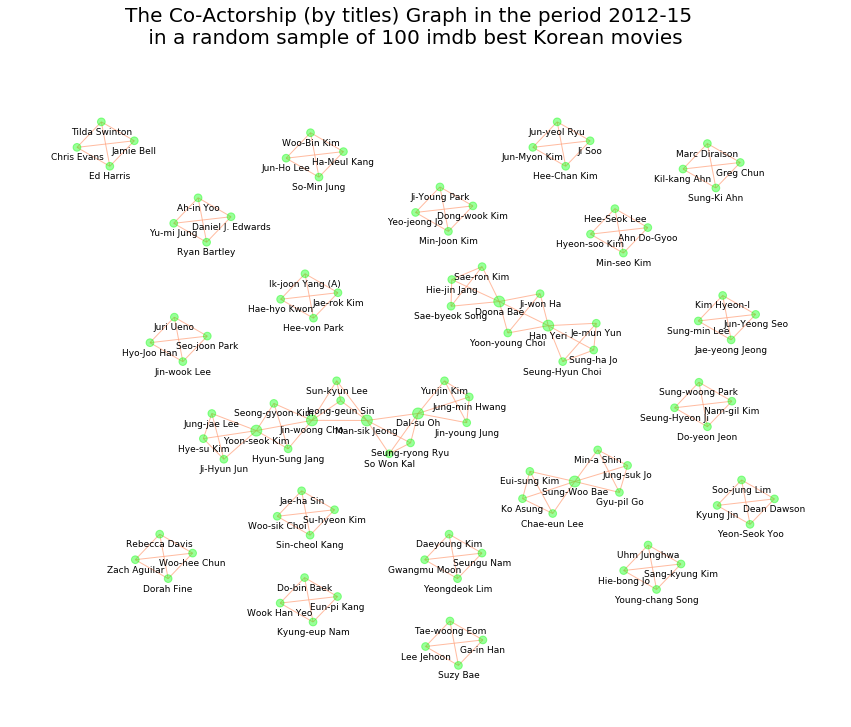

In [30]:
p=sslots[4]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 
pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[20*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()

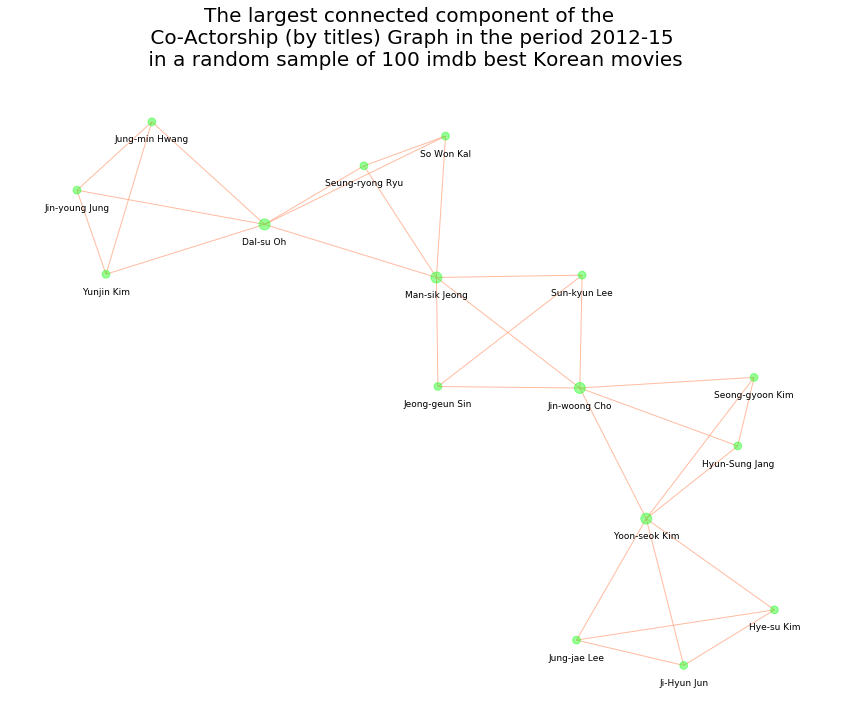

In [31]:
pos=graphviz_layout(Ga1c)

labels={}
for n in Ga1c.nodes():
    labels[n]=n
    
node_size2=[20*Ga1c.degree(n) for n in Ga1c.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1c,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1c,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The largest connected component of the \n Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1c, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()

The co-actorship (by titles) multigraph in the period 2016-19 has:
35 nodes (actors) and 54 edges (co-actorships by titles), i.e., pairs of actors starring in the same film)
The co-actorship (by titles) graph in the period 2016-19 is a multigraph
The co-actorship (by titles) graph in the period 2016-19 is a weighted graph
The co-actorship (by titles) graph in the period 2016-19 is not connected and it has 8 connected components
The largest connected component has:
7 nodes (actors) and 12 edges (co-actorships by titles)


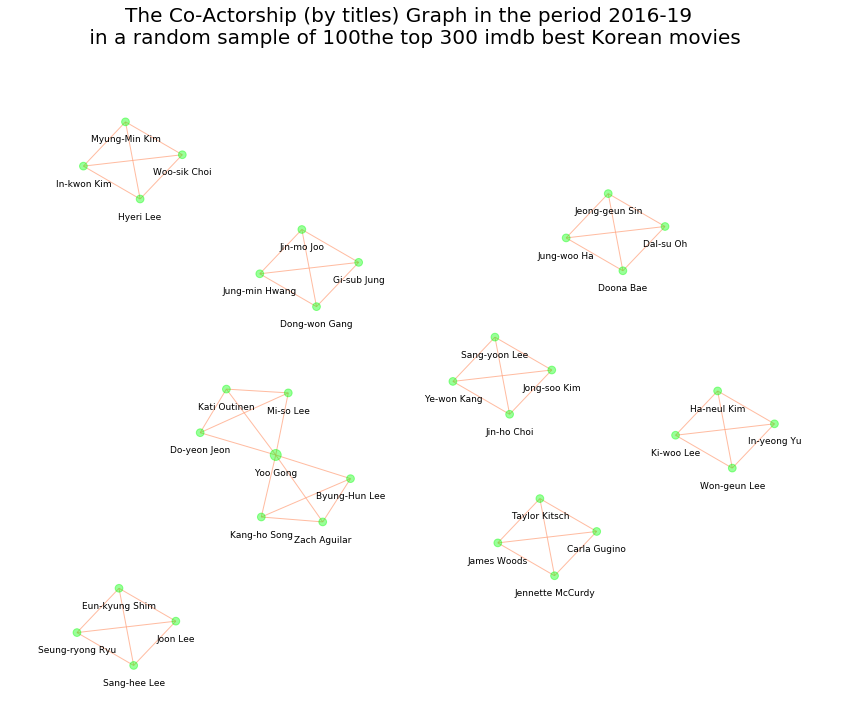

In [32]:
p=sslots[5]
Ga1=GG[p]

edge_width=[w['weight'] for u,v,w in Ga1.edges(data=True)] 
edge_width=[w for w in edge_width]
edge_width=[e[0] for e in edge_width]

print("The co-actorship (by titles) multigraph in the period %s has:" %p)
print("%i nodes (actors) and %i edges (co-actorships by titles), i.e., pairs of actors starring in the same film)" %(len(Ga1.nodes()), len(Ga1.edges())))

if Ga1.is_multigraph()==True:
    print("The co-actorship (by titles) graph in the period %s is a multigraph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is a simple graph" %p)
if nx.is_weighted(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is a weighted graph" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is an unweighted graph" %p)
    
ncc=nx.number_connected_components(Ga1)
if nx.is_connected(Ga1)==True:
    print("The co-actorship (by titles) graph in the period %s is connected" %p)
else:
    print("The co-actorship (by titles) graph in the period %s is not connected and it has %i connected components" %(p,ncc))
Gl = sorted(connected_component_subgraphs(Ga1), key = len, reverse=True)
Ga1c=Ga1.subgraph(Gl[0])
print('The largest connected component has:')
print("%i nodes (actors) and %i edges (co-actorships by titles)" %(len(Ga1c.nodes()), len(Ga1c.edges()))) 
pos=graphviz_layout(Ga1)

labels={}
for n in Ga1.nodes():
    labels[n]=n
    
node_size2=[20*Ga1.degree(n) for n in Ga1.nodes()]

fig = plt.figure(figsize=(15,12))
nx.draw_networkx_nodes(Ga1,pos=pos,node_color='lime',node_size=node_size2,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Ga1,pos=pos,edge_width=edge_width,edge_color='lightsalmon',alpha=0.7); 
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=15);
sst="The Co-Actorship (by titles) Graph in the period %s \n in a random sample of 100the top 300 imdb best Korean movies" %p
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Ga1, yoffset,labels=labels,font_size=9);
plt.margins(x=0.1, y=0.1);
plt.show()